In [1]:
#This performs experiments with the SSA and a bistable switch
#Code written by Mark Jayson Cortez for MATH6397.

import numpy as np
import matplotlib.pyplot as plt

In [8]:
def ssa(x,g,d,a_0,a_1,T):
    #molecule count    x=[A,rA,B,rB]
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0,0,0],[-1,0,0,0],[-1,1,0,0],[1,-1,0,0],[0,0,1,0],[0,0,-1,0],[0,0,-1,1],[0,0,1,-1]])
    while t_x[i]<T:
        a=np.array([g*(1-x[i,3]),d*x[i,0],a_0*x[i,0]*(1-x[i,1]-x[i,3]),a_1*x[i,1],g*(1-x[i,1]),d*x[i,2],a_0*x[i,2]*(1-x[i,1]-x[i,3]),a_1*x[i,3]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
    return x,t_x

def plot_trajectory(x,t):
    f,axes=plt.subplots(2,2,figsize=(15,3),gridspec_kw={"height_ratios": (.9, .1)})
    axes[0,0].plot(t,x[:,0],c='C0')
    axes[1,0].plot(t,x[:,1],c='C0')
    axes[0,1].plot(t,x[:,2],c='C1')
    axes[1,1].plot(t,x[:,3],c='C1')
    for i in range(2):
        axes[0,i].set_xticklabels([])
        axes[0,i].set_ylim([-6,80])
        axes[0,i].set_yticks(np.linspace(0,80,3))
        for j in range(2):
            axes[i,j].set_ylabel(labels[i][j])
        axes[1,i].set_xticks(np.linspace(0,N,4))
        axes[1,i].set_yticks([0,1])
    plt.tight_layout(h_pad=-1, w_pad=3)
    plt.show()

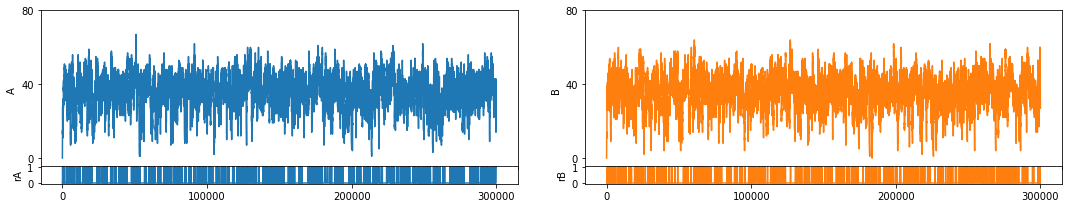

In [3]:
k=0.005
N=300000
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),0.2,0.005,0.00005,0.01,N)
plot_trajectory(x,t)

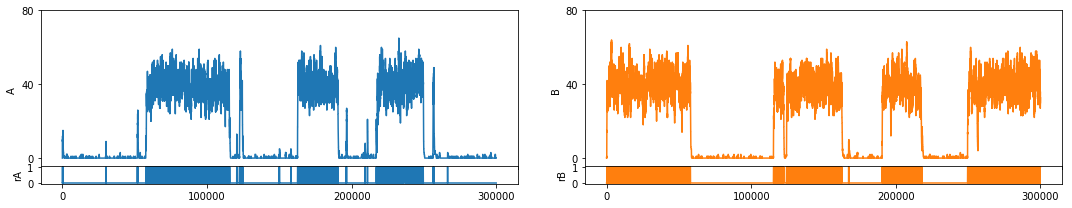

In [4]:
k=5
N=300000
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),0.2,0.005,0.05,0.01,N)
plot_trajectory(x,t)

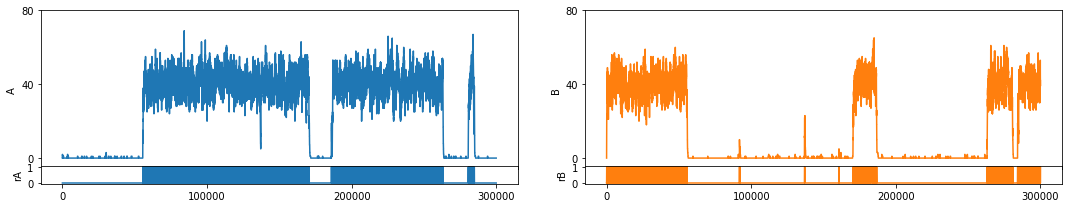

In [5]:
k=10
N=300000
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),0.2,0.005,0.1,0.01,N)
plot_trajectory(x,t)

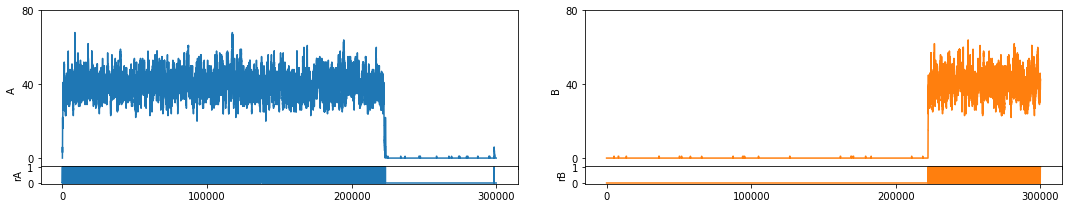

In [9]:
k=50
N=300000
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),0.2,0.005,0.5,0.01,N)
plot_trajectory(x,t)